<a href="https://colab.research.google.com/github/OlegKret/---/blob/master/lab5_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


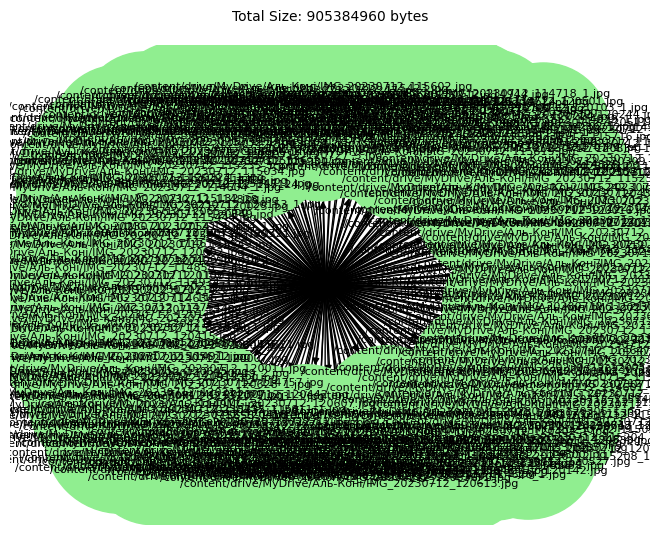

In [4]:
import os
import networkx as nx
import matplotlib.pyplot as plt
import math
from google.colab import drive

def create_directory_graph(root_dir, depth=1):
    G = nx.DiGraph()  # Directed graph for parent-child relationships
    total_size = 0

    def traverse(directory, current_depth):
        nonlocal total_size
        G.add_node(directory, type="directory", size=0)
        total_size += os.path.getsize(directory)  # Add directory size to total
        if current_depth >= depth:
            return
        for item in os.listdir(directory):
            item_path = os.path.join(directory, item)
            if os.path.isdir(item_path):
                G.add_edge(directory, item_path)
                traverse(item_path, current_depth + 1)
                G.nodes[directory]["size"] += G.nodes[item_path]["size"]
            else:
                G.add_node(item_path, type="file", size=os.path.getsize(item_path))
                G.add_edge(directory, item_path)
                total_size += os.path.getsize(item_path)  # Add file size to total

    traverse(root_dir, 0)
    return G, total_size



def visualize_directory_graph(G, total_size):
    pos = nx.spring_layout(G, k=0.15, iterations=20)  # Adjust layout parameters

    # Define node colors based on type
    node_colors = ["skyblue" if G.nodes[node]["type"] == "directory" else "lightgreen" for node in G]

    # Scaling node sizes for better visualization
    sizes = [math.sqrt(G.nodes[node]["size"]) * 5 for node in G]

    nx.draw(G, pos, with_labels=True, node_size=sizes, node_color=node_colors, font_size=8)

    # Add text labels for total sizes
    labels = {}
    for node in G.nodes():
        if G.nodes[node]["type"] == "directory":
            labels[node] = f"{G.nodes[node]['size']} bytes"
    nx.draw_networkx_labels(G, pos, labels, font_size=8)

    # Total size text at top
    rounded_total_size = round(total_size / 1024) * 1024
    plt.text(0.5, 1.05, f"Total Size: {rounded_total_size} bytes", ha="center", transform=plt.gca().transAxes)

    plt.show()

# Mount Google Drive
drive.mount('/content/drive')

# Example Usage:
root_directory = '/content/drive/MyDrive/Аль-Коні'  # Replace 'your_folder_name'
depth_level = 2  # Explore up to 2 levels deep

G, total_size = create_directory_graph(root_directory, depth_level)
visualize_directory_graph(G, total_size)